<a href="https://colab.research.google.com/github/rohithv-21/Hotel-booking-analysis/blob/main/Hotel_booking_analysis_(Team).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [1]:
# lets import the libraries required for data analysing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# lets import the data by mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the csv file

file_path ="/content/drive/MyDrive/Capstone Project/Rohith.V - Hotel booking analysis EDA/Hotel Bookings.csv"
hotel_booking_analysis_data = pd.read_csv(file_path)

In [5]:
# to get the top 5 rows from the imported data

hotel_booking_analysis_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_booking_analysis_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# lets get more info about numerical data
hotel_booking_analysis_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# find count of number of rows and columns
hotel_booking_analysis_data.shape

(119390, 32)

From the data we have 119390 rows and 32 columns

In [7]:
# lets analyze the data basically

hotel_booking_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Create a copy of the given dataset, so that our original dataset remains unchanged

In [8]:
# creating the copy of the given data

df = hotel_booking_analysis_data.copy()

In [9]:
# to find the sum of null rows 

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Data cleaning and handling of missing values**

Lets find the percentage of null values present in the dataset

In [11]:
# Create a function to find percentage of null values present

def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending = False)
    return percent_nan 

In [12]:
percent_nan = percent_missing(df)
percent_nan

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

Text(0.5, 0, 'Null value Columns')

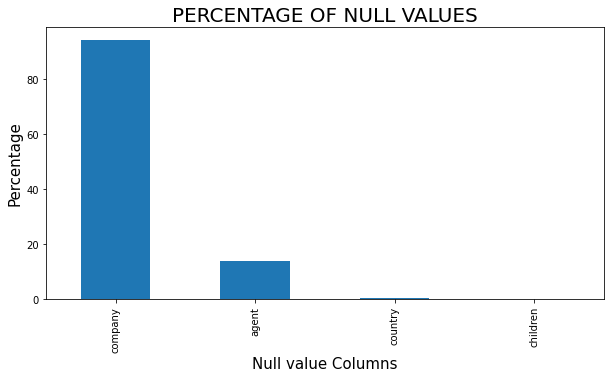

In [13]:
x = percent_nan.plot(figsize = (10,5) , kind = "bar")
plt.title('PERCENTAGE OF NULL VALUES' , fontsize = 20)
plt.ylabel('Percentage' , fontsize = 15)
plt.xlabel('Null value Columns' , fontsize = 15)

**Inference :** Clearly from the graph company column has got 94% and agent column has got 13% of null values where country and children columns has got less than 1%.

Since the company column has got 94% of the null values it is better to drop out this column

In [14]:
df.drop(["company"] ,axis = 1, inplace = True)

In [15]:
df.shape

(119390, 31)

We will fill the agent id with "Agent" and null agent id with "No Agent"

In [16]:
# First we will fill the agent ids with 'Agent'

df.loc[df.agent.isnull()==False,'agent']='Agent'

In [17]:
# Now we will fill the null values present in agent ids with 'No agent'

df.agent.fillna('No agent',inplace=True)

In [18]:
df[["agent"]].head()

,agent
0,No agent
1,No agent
2,No agent
3,Agent
4,Agent


We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns

In [19]:
df.country.fillna('Unknown',inplace=True)

In [20]:
df["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

We would fill the missing values in the children column with 0

In [21]:
df.children.fillna(0,inplace=True)

In [23]:
df[["children"]]

,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [24]:
# lets check again if we have any nulls present in our dataset

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

So now we got all the columns and rows with no null values. 

Now our data is cleaned and missing values has been tackled

Now, lets check for duplicate data, if present lets remove those values

In [25]:
# checking for duplicate data
df.duplicated().sum()

32014

In [26]:
# removing the duplicate data
df.drop_duplicates(inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87376 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87376 non-null  object 
 1   is_canceled                     87376 non-null  int64  
 2   lead_time                       87376 non-null  int64  
 3   arrival_date_year               87376 non-null  int64  
 4   arrival_date_month              87376 non-null  object 
 5   arrival_date_week_number        87376 non-null  int64  
 6   arrival_date_day_of_month       87376 non-null  int64  
 7   stays_in_weekend_nights         87376 non-null  int64  
 8   stays_in_week_nights            87376 non-null  int64  
 9   adults                          87376 non-null  int64  
 10  children                        87376 non-null  float64
 11  babies                          87376 non-null  int64  
 12  meal                           

We are adding 2 Extra Columns for more clarification


1.   Total Stay in the Hotel
2.   Total number of people



In [28]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
df[['total_stay']].head()

,total_stay
0,0
1,0
2,1
3,1
4,2


In [29]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']
df[['total_people']].head().astype("int64")

,total_people
0,2
1,2
2,1
3,1
4,2


#**Performing EDA**

**Corealtion Heatmap for Numerical Data**

In [30]:
numerical_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


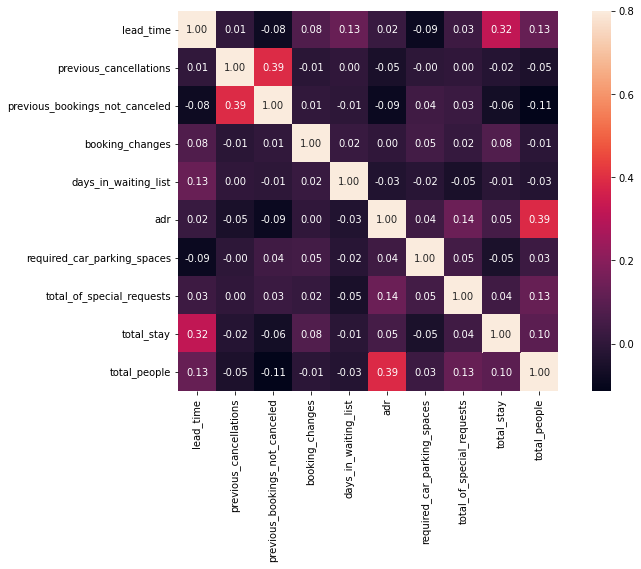

In [31]:
corrmat = numerical_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);


**Inference :**
1.   adr is slightly correlated with total_people, which makes sense as more number of people means more revenue, therefore more adr.



Lets check whether the length of stay effects the adr

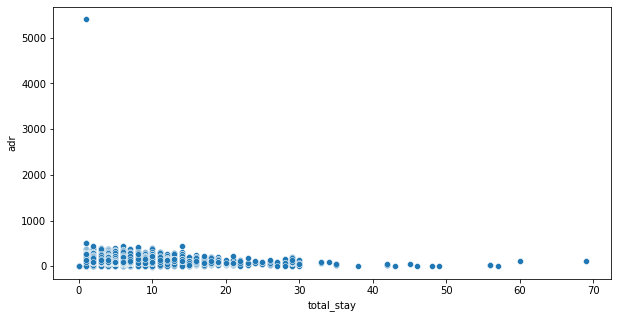

In [32]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

**Inference :** We notice that there is an outlier in adr, so we will remove that for better scatter plot

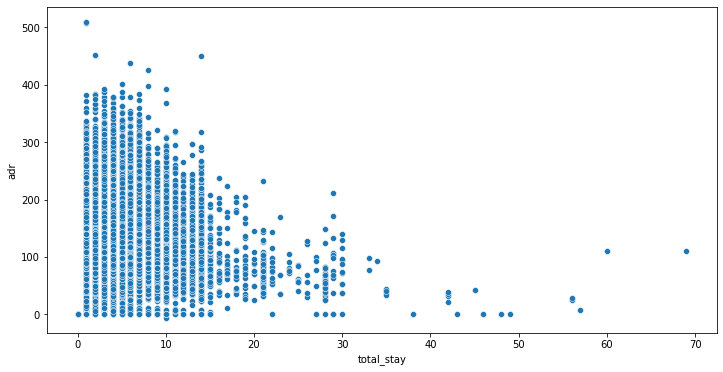

In [33]:
df.drop(df[df['adr'] > 5000].index, inplace = True)
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()


**EDA Based on Hotel**

1) Most Preffered Hotel

          hotel  Booking %
0    City Hotel  61.135336
1  Resort Hotel  38.864664


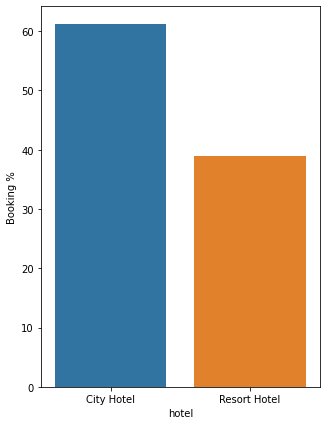

In [39]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
print(d1)
plt.figure(figsize = (5,7))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


**Inference :** Clearly from the graph City hotel is preffered more than Resort Hotels

2) Duration of stays in each Hotel

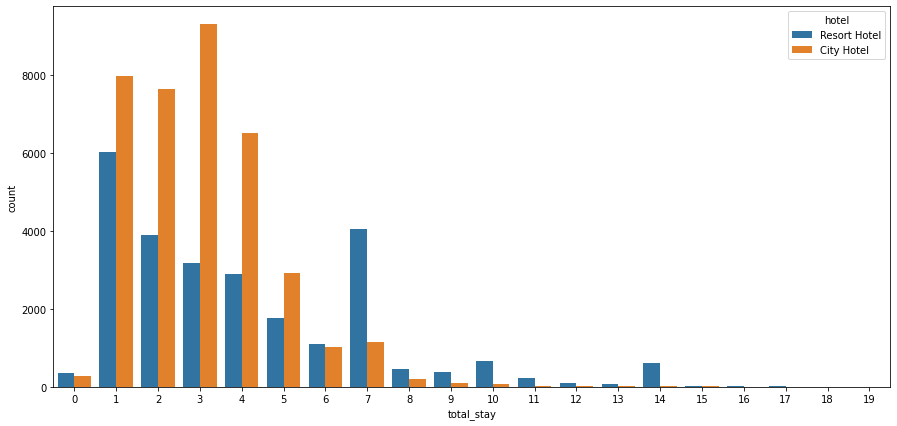

In [47]:
not_canceled = df[df['is_canceled'] == 0]
i = not_canceled[not_canceled['total_stay'] < 20]
plt.figure(figsize = (15,7))
sns.countplot(x = i['total_stay'], hue = i['hotel'])
plt.show()

**Inference :** Peoples prefer to stay more in **city hotels** for **short duration** (i.e.,for less than 5 days). Where as for **longer duration** peoples prefer to stay in **Resort hotels**

**EDA based on Cancelation bookings**

1) Cancelation done on the basis of months

In [67]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancelled = cancelled_data.groupby('arrival_date_month')
x = pd.DataFrame(cancelled.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('arrival_date_month')
total_booking = grouped_by_hotel.size()
y = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
z = pd.concat([x,y], axis = 1)

# Calculating cancel percentage 
z['cancel_%'] = round((z['total_cancelled_bookings']/z['total_bookings'])*100,2)
z


,total_cancelled_bookings,total_bookings,cancel_%
arrival_date_month,,,
April,2409,7907,30.47
August,3621,11254,32.18
December,1378,5129,26.87
February,1415,6097,23.21
January,1038,4692,22.12
July,3198,10055,31.81
June,2353,7764,30.31
March,1829,7510,24.35
May,2442,8353,29.24


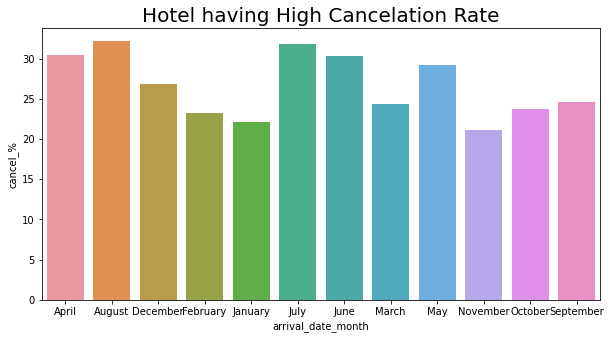

In [68]:
plt.figure(figsize = (10,5))
sns.barplot(x = z.index, y = z['cancel_%']).set_title("Hotel having High Cancelation Rate" , fontsize = 20)
plt.show()

**Inference :** From the analyzation, in the month of **july** and **august** cancelation is done more.

2) Hotels having high cancelation rate

In [70]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data_over_week_no = df[df['is_canceled'] == 1]
cancel = cancelled_data_over_week_no.groupby('hotel')
a = pd.DataFrame(cancel.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_hotel = df.groupby('hotel')
total_booking_done = grouped_hotel.size()
b = pd.DataFrame(total_booking_done).rename(columns = {0: 'total_bookings'})
c = pd.concat([a,b], axis = 1)

# Calculating cancel percentage 
c['cancel%'] = round((c['total_cancelled_bookings']/c['total_bookings'])*100,2)
c

,total_cancelled_bookings,total_bookings,cancel%
hotel,,,
City Hotel,16046,53417,30.04
Resort Hotel,7974,33958,23.48


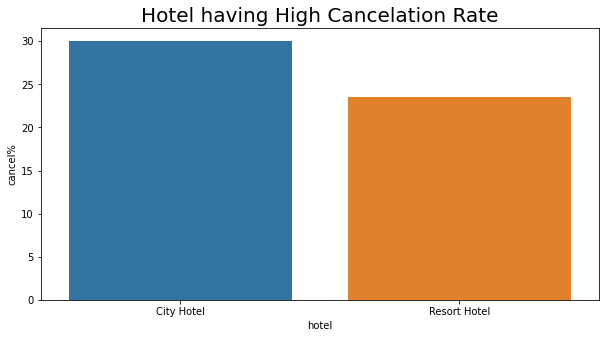

In [73]:
plt.figure(figsize = (10,5))
sns.barplot(x = c.index, y = c['cancel%']).set_title("Hotel having High Cancelation Rate" , fontsize = 20)
plt.show()

**Inference :** City hotels have higher cancelation rates (of 30%) compared to resort hotels 

**EDA on arrival period**

1) Arrival period based on Years

Text(0.5, 1.0, 'Number of arrival per Year')

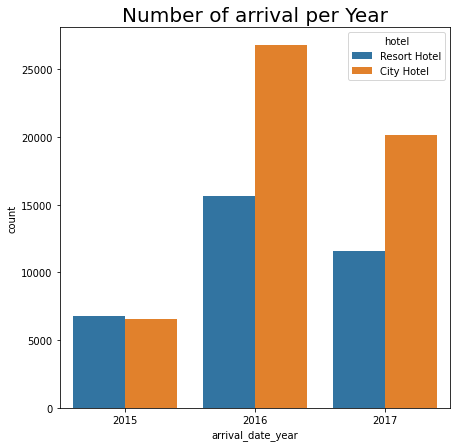

In [79]:
l = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[l]
plt.figure(figsize=(7,7))
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('Number of arrival per Year',fontsize=20)


**Inference :** In the year 2016 has high amount of arriving peoples

2) Lets see which month has highest arriving month 

Text(0, 0.5, 'Count')

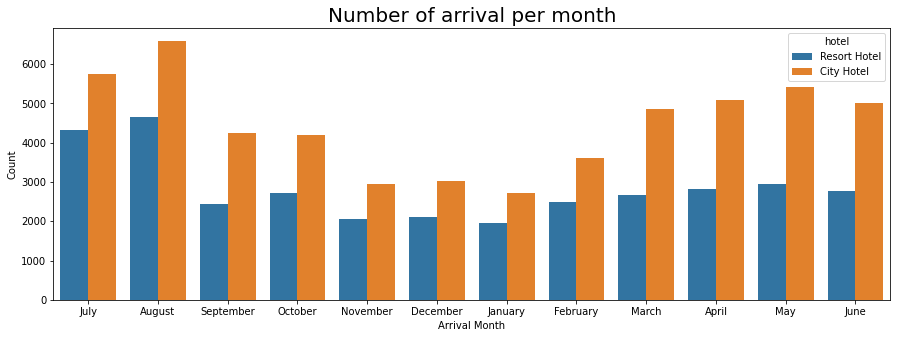

In [71]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel').set_title('Number of arrival per month',fontsize=20) 
plt.xlabel('Arrival Month')
plt.ylabel('Count')


**Inference :** Clearly from the graph in the month of August has high period of arrivals, followed by July.... 

3) Similarly lets the the arrivals based on days of months

Text(0, 0.5, 'Count')

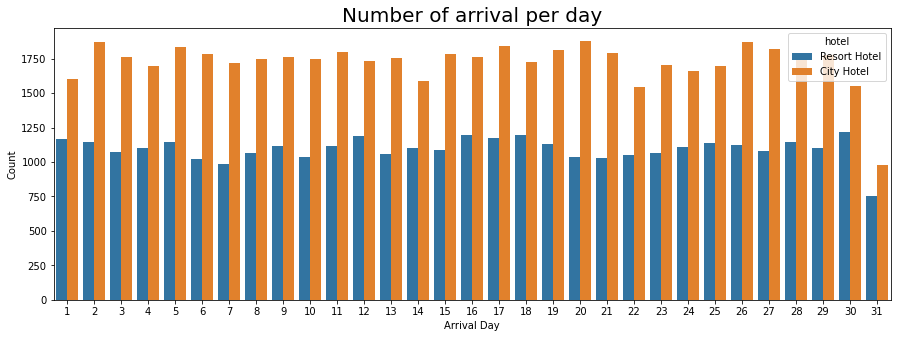

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrival per day', fontsize = 20)
plt.xlabel('Arrival Day')
plt.ylabel('Count')

**Inference :** We do notice a roller coaster trend for the arrival day of month. So we cant clearly specify which day has high arrival rate

**EDA Based on Market segment and Distribution channel**

1) Mode of bookings based on Market segment? 

Text(0.5, 1.0, 'Types of market segment')

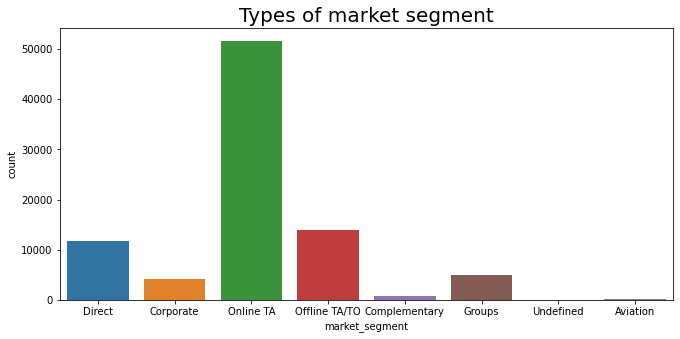

In [94]:
plt.figure(figsize=(11,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

**Inference :** Majority booking is done through Online Travel Agencies(TA) 

2) Mode of Distribution Channel

Text(0.5, 1.0, 'Types of distribution channel')

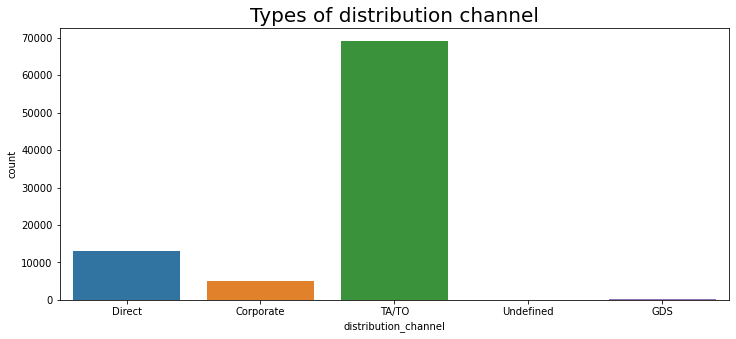

In [84]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

**Inference :** Distribution channels and market segments involve travel agencies.
*   We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.




**EDA based on stays in weekend or week days**

1) Number of Stays in Weekend Nights

Text(0.5, 1.0, 'Number of stays on weekend nights')

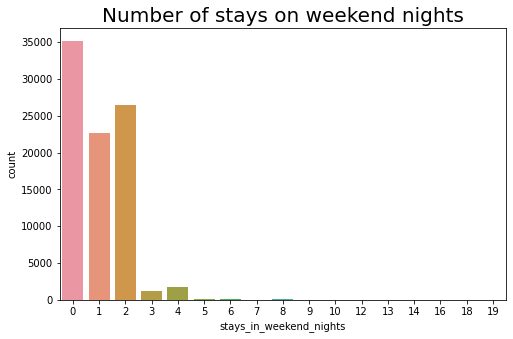

In [86]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

2) Number of Stays in Week Nights

Text(0.5, 1.0, 'Number of stays on weekday night')

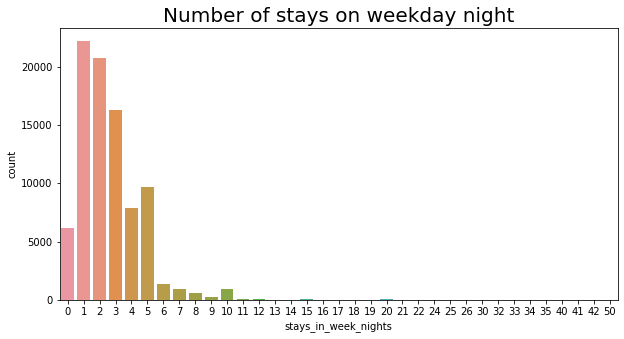

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

**Inference :** From both the graphs, it seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

**EDA based on Meals**

In [67]:
# categories of meal feature  we have in our data
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

**People at each hotel can choose from four categories of meals which they can book their respective stays with, let's briefly see what those are**

*   Undefined/SC – no meal package
*   BB – Bed & Breakfast
*   HB – Half board (breakfast and one other meal – usually dinner)
*   FB – Full board (breakfast, lunch and dinner)






In [73]:
# Group them according to City and Resort Hotels
meal_category = df.groupby(['hotel'])['meal'].value_counts()
meal_category

hotel         meal     
City Hotel    BB           41219
              SC            9396
              HB            2791
              FB              11
Resort Hotel  BB           26742
              HB            6292
              Undefined      492
              FB             348
              SC              84
Name: meal, dtype: int64

Text(0.5, 1.0, 'Meals opted in each hotels')

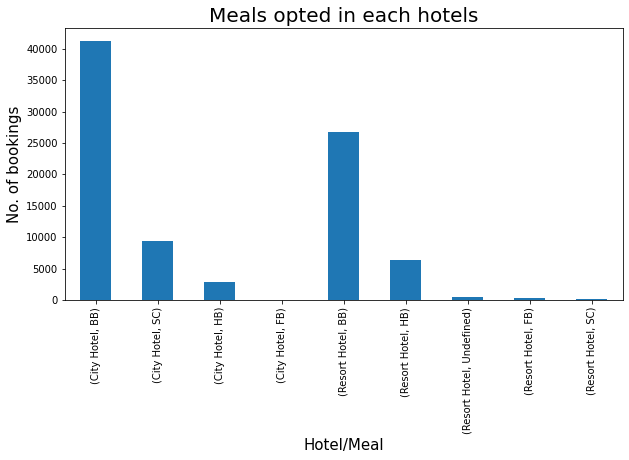

In [74]:
plt.rcParams['figure.figsize'] = (10,5)
meal_category.plot(kind= 'bar')

plt.ylabel('No. of bookings',fontsize = 15)
plt.xlabel('Hotel/Meal',fontsize = 15)
plt.title('Meals opted in each hotels',fontsize = 20)


**Inference :** Most the peoples prefer to opt BB(Bed & Breakfast) in both city and resort hotels.

From the above chart, let me explain how. We have each hotel with respective food categories and the number of booking that people are doing in each hotel with each meal category, now it is clear that, in Resort Hotel or city Hotel, people mostly prefer to go with the BB-category (i.e., bed and breakfast)

**EDA based on Types of Visitors**

1) Number of Adults

Text(0.5, 1.0, 'Number of adults')

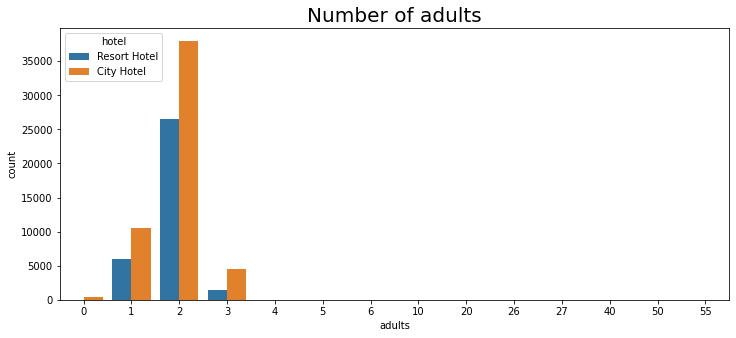

In [95]:
# Lets check what type of visitors travel more
plt.rcParams['figure.figsize'] = (12,5)
sns.countplot(data = df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

**Inference :** Clearly from the graph, assuming that adults = 2 is Couples, we can say that maximum couples travel.

2) Number of Childrens

Text(0.5, 1.0, 'Number of children')

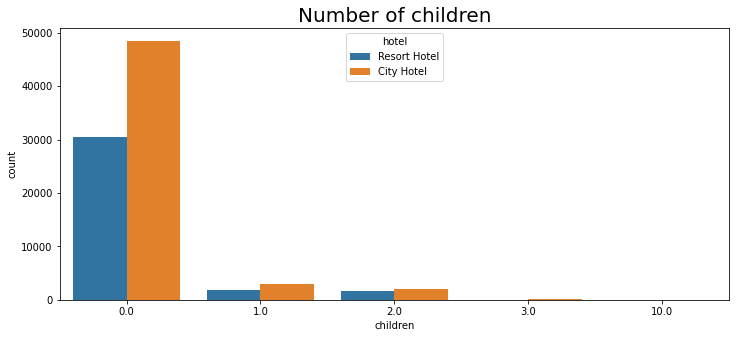

In [90]:
plt.rcParams['figure.figsize'] = (12,5)
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

**Inference :** Genrally no childrens were travelled more

3) Number of Babies

Text(0.5, 1.0, 'Number of Babies')

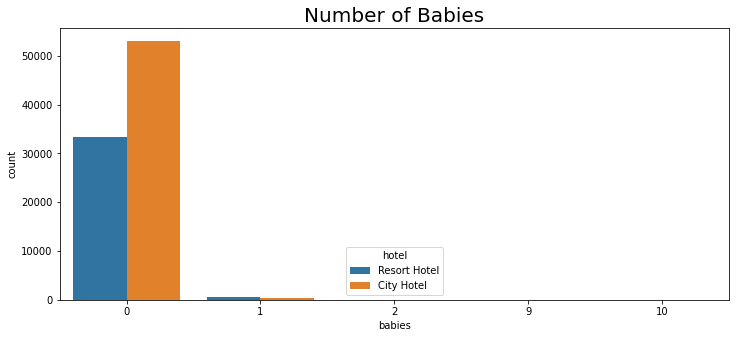

In [91]:
plt.rcParams['figure.figsize'] = (12,5)
sns.countplot(data = df, x = 'babies', hue = 'hotel').set_title("Number of Babies", fontsize = 20)

**Inference :** Usually no babies were travelled more

# Summary



*   Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
*   People also prefer to stay for longer duration in Resort Hotels and prefer City Hotels for Shorter duration. 
*   We also realise that the high rate of cancellations can be due high no deposit policies.
*   We should also target months between May to Aug. Those are peak months due to the summer period.
*   Majority of the bookings are done through online travel agents
*   Most the peoples prefer to stay in week day nights comared to weekends
*   Majority of the peoples prefer BB(Bed & Breakfast) category in the meal section
*   Genrally couples travel most from the data







